# **Financial Management ECON/FIN F315 Assignment-2 By Group-1**

# Calculation of Weighted Average Cost of Capital(WACC) for a listed firm

# Industry chosen for Analysis : IT & ITES Industry in India

1.   Target Company : Infosys
2.   Comparable Companies : Mphasis,TCS and Wipro
3.   Market Index : NIFTY 50 index









In [ ]:
#Install required libraries
!pip install yfinance
import matplotlib.pyplot as plt
import statsmodels.api as sm
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Data Set Preparation

For analysis Monthly stock prices from FY 2015 to FY 2019 are considered


In [ ]:
# 1.Download stock prices for the security monthly data last 5 years
infy_df = yf.download('INFY.NS', 
                      start='2015-04-01', 
                      end='2019-04-01', 
                      progress=False,interval ='1mo'
)
infy_df.head() #To preview first 5 rows of the table

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-04-01,549.724976,561.250000,483.075012,485.562500,405.379150,218636380.0
2015-05-01,485.562500,515.474976,477.000000,505.787506,422.264343,164070368.0
2015-06-01,508.200012,516.000000,484.000000,492.174988,410.899689,139774544.0
2015-06-15,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-01,494.500000,574.500000,466.325012,538.525024,456.412903,177091334.0


In [ ]:
#2.Download Market index closing prices
nifty_df = yf.download('^NSEI',start='2015-04-01', 
                      end='2019-04-01', 
                      progress=False,interval ='1mo',
)
nifty_df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-04-01,8483.700195,8841.650391,8144.750000,8181.500000,8181.500000,3108200
2015-05-01,8230.049805,8489.549805,7997.149902,8433.650391,8433.650391,3384800
2015-06-01,8417.250000,8467.150391,7940.299805,8368.500000,8368.500000,3156900
2015-07-01,8376.250000,8654.750000,8315.400391,8532.849609,8532.849609,3097900
2015-08-01,8510.650391,8621.549805,7667.250000,7971.299805,7971.299805,3939200


In [ ]:
#3.Calculate Log returns
nifty_df['Return_NIFTY'] = np.log(nifty_df['Adj Close']/nifty_df['Adj Close'].shift(1))
print(nifty_df['Return_NIFTY']) 

Date
2015-04-01         NaN
2015-05-01    0.030354
2015-06-01   -0.007755
2015-07-01    0.019449
2015-08-01   -0.068076
2015-09-01   -0.002814
2015-10-01    0.014599
2015-11-01   -0.016318
2015-12-01    0.001398
2016-01-01   -0.049372
2016-02-01   -0.079282
2016-03-01    0.102137
2016-04-01    0.014293
2016-05-01    0.038768
2016-06-01    0.015522
2016-07-01    0.041450
2016-08-01    0.016953
2016-09-01   -0.020124
2016-10-01    0.003113
2016-11-01   -0.049054
2016-12-01   -0.004717
2017-01-01    0.044851
2017-02-01    0.036504
2017-03-01    0.032590
2017-04-01    0.014104
2017-05-01    0.033524
2017-06-01   -0.010485
2017-07-01    0.056776
2017-08-01   -0.015924
2017-09-01   -0.013123
2017-10-01    0.054347
2017-11-01   -0.010578
2017-12-01    0.029308
2018-01-01    0.046115
2018-02-01   -0.049716
2018-03-01   -0.036803
2018-04-01    0.060024
2018-05-01   -0.000298
2018-06-01   -0.002037
2018-07-01    0.058211
2018-08-01    0.028131
2018-09-01   -0.066368
2018-10-01   -0.051036
2018-1

**Data Visualisation**

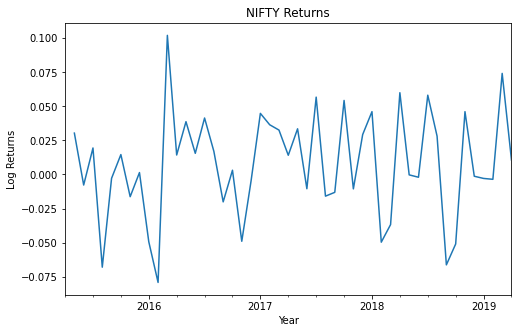

In [ ]:
nifty_df['Return_NIFTY'].plot(figsize=(8,5)) #Plot log returns of NIFTY Index Vs Year
plt.xlabel('Year') 
plt.ylabel('Log Returns')
plt.title("NIFTY Returns")
plt.show()

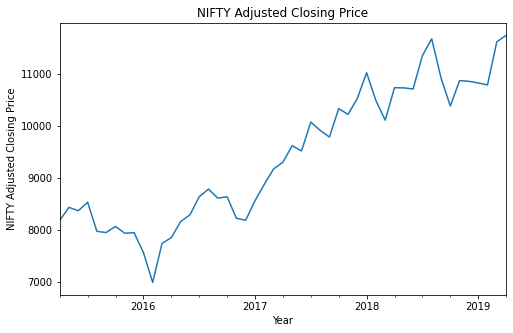

In [ ]:
nifty_df['Adj Close'].plot(figsize=(8,5)) #Plot Adjusted Close of NIFTY Index Vs Year
plt.xlabel('Year') 
plt.ylabel('NIFTY Adjusted Closing Price')
plt.title("NIFTY Adjusted Closing Price")
plt.show()

**Data Cleaning**

In [ ]:
nifty_df1 = nifty_df.dropna(axis=0) # Remove rows with Null Values
nifty_df1.head()

,Open,High,Low,Close,Adj Close,Volume,Return_NIFTY
Date,,,,,,,
2015-05-01,8230.049805,8489.549805,7997.149902,8433.650391,8433.650391,3384800,0.030354
2015-06-01,8417.250000,8467.150391,7940.299805,8368.500000,8368.500000,3156900,-0.007755
2015-07-01,8376.250000,8654.750000,8315.400391,8532.849609,8532.849609,3097900,0.019449
2015-08-01,8510.650391,8621.549805,7667.250000,7971.299805,7971.299805,3939200,-0.068076
2015-09-01,7907.950195,8055.000000,7539.500000,7948.899902,7948.899902,3436500,-0.002814


In [ ]:
#Caclulate log returns
infy_df['Return_INFY'] = np.log(infy_df['Adj Close']/infy_df['Adj Close'].shift(1)) 
print(infy_df['Return_INFY']) 

Date
2015-04-01         NaN
2015-05-01    0.040809
2015-06-01   -0.027282
2015-06-15         NaN
2015-07-01         NaN
2015-08-01    0.015981
2015-09-01    0.059893
2015-10-01   -0.023071
2015-10-16         NaN
2015-11-01         NaN
2015-12-01    0.015958
2016-01-01    0.052428
2016-02-01   -0.071931
2016-03-01    0.116752
2016-04-01   -0.008408
2016-05-01    0.033014
2016-06-01   -0.064376
2016-06-09         NaN
2016-07-01         NaN
2016-08-01   -0.036028
2016-09-01    0.000193
2016-10-01   -0.037919
2016-10-21         NaN
2016-11-01         NaN
2016-12-01    0.035298
2017-01-01   -0.084621
2017-02-01    0.086401
2017-03-01    0.009682
2017-04-01   -0.106530
2017-05-01    0.061306
2017-06-01   -0.043403
2017-07-01    0.092970
2017-08-01   -0.100024
2017-09-01   -0.016586
2017-10-01    0.024099
2017-10-31         NaN
2017-11-01         NaN
2017-12-01    0.065380
2018-01-01    0.098790
2018-02-01    0.019244
2018-03-01   -0.035414
2018-04-01    0.058096
2018-05-01    0.026572
2018-0

In [ ]:
infy_df1 = infy_df.dropna(axis=0) # Remove rows with Null Values
infy_df1.head()

,Open,High,Low,Close,Adj Close,Volume,Return_INFY
Date,,,,,,,
2015-05-01,485.562500,515.474976,477.000000,505.787506,422.264343,164070368.0,0.040809
2015-06-01,508.200012,516.000000,484.000000,492.174988,410.899689,139774544.0,-0.027282
2015-08-01,539.000000,593.099976,522.250000,547.200012,463.765228,175816384.0,0.015981
2015-09-01,545.000000,584.474976,526.150024,580.974976,492.390289,165212106.0,0.059893
2015-10-01,584.950012,609.900024,542.599976,567.724976,481.160461,178869960.0,-0.023071


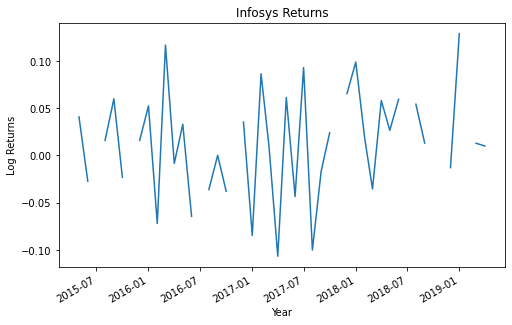

In [ ]:
infy_df['Return_INFY'].plot(figsize=(8,5)) # Plot Infosys Returns Vs Year
plt.xlabel('Year') 
plt.ylabel('Log Returns')
plt.title("Infosys Returns")
plt.show()
plt.show()

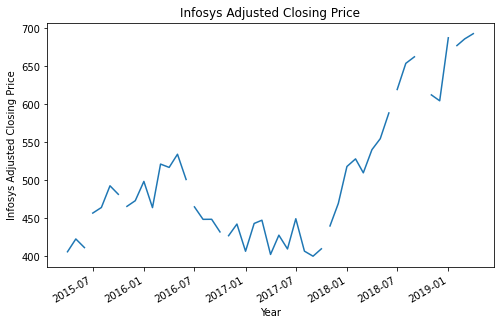

In [ ]:
infy_df['Adj Close'].plot(figsize=(8,5)) #Plot Adjusted Close price of Infosys Vs Year
plt.xlabel('Year') 
plt.ylabel('Infosys Adjusted Closing Price')
plt.title("Infosys Adjusted Closing Price")
plt.show()

In [ ]:
infy_df1_returns = infy_df1['Return_INFY']
infy_df1_returns.head()


Date
2015-05-01    0.040809
2015-06-01   -0.027282
2015-08-01    0.015981
2015-09-01    0.059893
2015-10-01   -0.023071
Name: Return_INFY, dtype: float64

In [ ]:
nifty_df1_returns = nifty_df1['Return_NIFTY']
nifty_df1_returns.head()

Date
2015-05-01    0.030354
2015-06-01   -0.007755
2015-07-01    0.019449
2015-08-01   -0.068076
2015-09-01   -0.002814
Name: Return_NIFTY, dtype: float64

In [ ]:
returns = pd.merge(nifty_df1_returns,infy_df1_returns,how='inner',on='Date') # Inner Join infosys returns(infy_df1_returns) and NIFTY returns(nifty_df1_returns)
print(returns.head())
print(returns.describe())

            Return_NIFTY  Return_INFY
Date                                 
2015-05-01      0.030354     0.040809
2015-06-01     -0.007755    -0.027282
2015-08-01     -0.068076     0.015981
2015-09-01     -0.002814     0.059893
2015-10-01      0.014599    -0.023071
       Return_NIFTY  Return_INFY
count     39.000000    39.000000
mean       0.008388     0.013408
std        0.039273     0.057465
min       -0.079282    -0.106530
25%       -0.009120    -0.025177
50%        0.010632     0.015958
75%        0.033057     0.056137
max        0.102137     0.128825


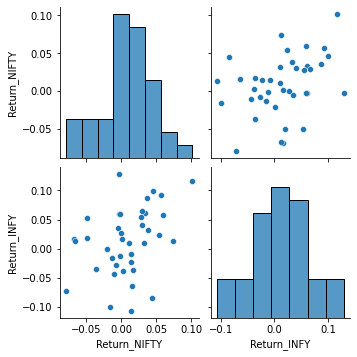

In [ ]:
sns.pairplot(returns) #To plot multiple pairwise bivariate distributions in a dataset
plt.show()

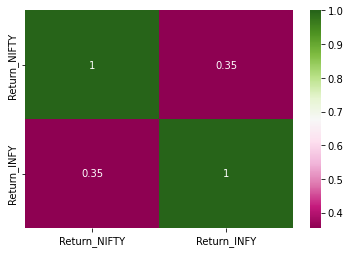

In [ ]:
sns.heatmap(returns.corr(), annot = True, cmap="PiYG") # To show relationships between NIFTY and Infosys returns,
plt.show()

## Calculation of  cost of equity capital Using Top-Down Approach


> To find unlevered Beta of the stock by running a regression with dependent  variable as target company monthly returns and
independent variable as market returns



In [ ]:
x = returns['Return_NIFTY']
y = returns['Return_INFY']
x_sm = sm.add_constant(x)

**Assumptions of OLS regression**

1.   A linear relationship between the dependent and independent variables i.e.The linear regression model is linear in parameters
2.   The independent variables are not highly correlated with each other i.e.no multicollinearity
3. The variance of the residuals is constant i.e. no heteroskedasticity
4. Random sampling of observation and no autocorrelation
5. Normality of Errors



#Ri = αi + βi(RM) + εi.........Market model

• Ri = Return of security i

• αi = The return from the asset that is not related to the market’s return. This is “alpha” return from the security

• βi = Beta or the return from the security explained by the market index’s return

• RM = The market index’s return

• εi = Error term for past returns not explained by the regression equation

In [ ]:
#4.Regression - Market model from statsmodels.api library
model = sm.OLS(y,x_sm)

#OLS estimation or Ordinary Least square 
Works on the principle of Minimizing the sum of squared errors

In [ ]:
results = model.fit()

In [ ]:
#5.Calculation of beta levered for the firm
#6.check for statistical significance of beta
p_val = results.pvalues[1]
if p_val < 0.05:
  print("Beta Significant")
  coeff = results.params
  beta = coeff[1]
else:
  print("Beta Insignificant")
  beta = 0
print("Beta_levered_infy =",beta)



Beta Significant
Beta_levered_infy = 0.5188961650305294


#Beta Levered  for Infosys stock = 0.5189 at a significance level of  5%


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 39 entries, 2015-05-01 to 2019-04-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Return_NIFTY  39 non-null     float64
 1   Return_INFY   39 non-null     float64
dtypes: float64(2)
memory usage: 936.0 bytes


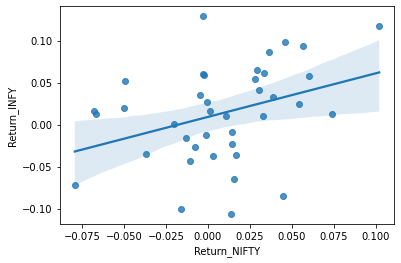

In [ ]:
#Regression - Security Characteristic line
returns.info()
sns.regplot(x = 'Return_NIFTY', y = 'Return_INFY', data = returns)

 **8. Risk Free Rate**

In [ ]:
Rf=0.0648     #To find Average of Monthly risk-free rate for the period from http://www.epwrfits.in/TreeViewSecurity.aspx

Rm = nifty_df1['Return_NIFTY'].mean() #Average Market returns
Rm = pow((1+Rm),12)-1 #Annualizing the Market returns
print("Risk free rate in %:",Rf*100)
print("Market Returns in %:",Rm*100)

Risk free rate in %: 6.4799999999999995
Market Returns in %: 9.430106053144272


**Cost of Equity Capital for Infosys Using Top Down-approach**

In [ ]:
Ke = Rf + beta*(Rm - Rf) # CAPM Model
print("Cost of Equity Capital for Infosys Using Top Down-approach in %:",Ke*100)

Cost of Equity Capital for Infosys Using Top Down-approach in %: 8.010798717409912


**Cost of Equity Capital for Infosys Using Top Down-approach: 8.0108%**


##Bottom Up Approach 
By Unlevering and Relevering of betas to find cost of equity capital



> Employing Similar kind of analysis(OLS) to find the Beta levered for comparable companies i.e. Mphasis,TCS and Tech Mahindra 





In [ ]:
#Download stock prices for the security monthly data last 5 years
mphasis_df = yf.download('MPHASIS.NS', 
                      start='2015-04-01', 
                      end='2019-04-01', 
                      progress=False,interval ='1mo'
)
infy_df.head()

#Caclulate log returns
mphasis_df['Return_MPHASIS'] = np.log(mphasis_df['Adj Close']/mphasis_df['Adj Close'].shift(1))


mphasis_df1 = mphasis_df.dropna(axis=0)
mphasis_df1.head()

mphasis_df1_returns = mphasis_df1['Return_MPHASIS']
mphasis_df1_returns.head()

returns = pd.merge(nifty_df1_returns,mphasis_df1_returns,how='inner',on='Date')

x = returns['Return_NIFTY']
y = returns['Return_MPHASIS']
x_sm = sm.add_constant(x)

#Regression - Market model 
model = sm.OLS(y,x_sm)

results = model.fit()

#Regression result
p_val = results.pvalues[1]
if p_val < 0.05:
  print("Beta Significant")
  coeff = results.params
  beta1 = coeff[1]
else:
  print("Beta Insignificant")
  beta1 = 0
print("Beta_levered_Mphasis =",beta1)

Beta Significant
Beta_levered_Mphasis = 1.0605873621224635


In [ ]:
#Download stock prices for the security monthly data last 5 years
tcs_df = yf.download('TCS.NS', 
                      start='2015-04-01', 
                      end='2019-04-01', 
                      progress=False,interval ='1mo'
)
infy_df.head()

#Caclulate log returns
tcs_df['Return_TCS'] = np.log(tcs_df['Adj Close']/tcs_df['Adj Close'].shift(1))

wipro_df1 = tcs_df.dropna(axis=0)

wipro_df1_returns = wipro_df1['Return_TCS']

returns = pd.merge(nifty_df1_returns,wipro_df1_returns,how='inner',on='Date')

x = returns['Return_NIFTY']
y = returns['Return_TCS']
x_sm = sm.add_constant(x)

model = sm.OLS(y,x_sm)

results = model.fit()

#Regression result
p_val = results.pvalues[1]
if p_val < 0.05:
  print("Beta Significant")
  coeff = results.params
  beta2 = coeff[1]
else:
  print("Beta Insignificant")
  beta2 = 0
print("Beta_levered_TCS =",beta2)

Beta Significant
Beta_levered_TCS = 1.0756938815720811


In [ ]:
#Download stock prices for the security monthly data last 5 years
tech_mahindra_df = yf.download('TECHM.NS', 
                      start='2015-04-01', 
                      end='2020-04-01', 
                      progress=False,interval ='1mo'
)
infy_df.head()
#TECHM.NS
#Caclulate log returns
tech_mahindra_df['Return_TECHM'] = np.log(tech_mahindra_df['Adj Close']/tech_mahindra_df['Adj Close'].shift(1))

tech_mahindra_df1 = tech_mahindra_df.dropna(axis=0)

tech_mahindra_df1_returns = tech_mahindra_df1['Return_TECHM']

returns = pd.merge(nifty_df1_returns,tech_mahindra_df1_returns,how='inner',on='Date')

x = returns['Return_NIFTY']
y = returns['Return_TECHM']
x_sm = sm.add_constant(x)

model = sm.OLS(y,x_sm)

results = model.fit()

#Regression result
p_val = results.pvalues[1]
if p_val < 0.05:
  print("Beta Significant")
  coeff = results.params
  beta3 = coeff[1]
else:
  print("Beta Insignificant")
  beta3 = 0
print("Beta_levered_Tech Mahindra =",beta3)  #Note : Beta levered is zero because its statistically not significant,it can happen that for the period of analysis beta turned out to be zero

Beta Insignificant
Beta_levered_Tech Mahindra = 0


**Calculation of Unlevered Beta for Comparable Firms**

For finding beta levered for comparable firms Average Debt/equity ratio is considered

In [ ]:
mphasis = yf.Ticker("MPHASIS.NS")
balancesheet = mphasis.balance_sheet
years = balancesheet.columns
d_e_final = 0
for i in range(1,4):
  d_e = balancesheet[years[i]][2]/balancesheet[years[i]][3]
  d_e_final += d_e
d_e_avg1 = d_e_final / 3
print("D/E for Mphasis:",d_e_avg1)
balancesheet

D/E for Mphasis: 0.39330078500058896


,2021-03-31,2020-03-31,2019-03-31,2018-03-31
Intangible Assets,1.074480e+09,8.872600e+08,9.242500e+08,9.542800e+08
Capital Surplus,5.964000e+08,2.661800e+08,6.926000e+07,9.518000e+07
Total Liab,2.872238e+10,2.923892e+10,2.121244e+10,1.503555e+10
Total Stockholder Equity,6.526710e+10,5.829599e+10,5.249818e+10,5.481782e+10
Deferred Long Term Liab,4.665500e+08,4.630100e+08,NaN,NaN
Other Current Liab,3.613900e+09,3.105200e+09,2.992010e+09,2.328020e+09
Total Assets,9.398948e+10,8.753491e+10,7.371062e+10,6.985337e+10
Common Stock,1.870420e+09,1.865360e+09,1.862190e+09,1.932600e+09
Other Current Assets,1.972950e+09,1.171040e+09,1.560250e+09,1.755590e+09
Retained Earnings,5.413394e+10,4.852846e+10,4.373337e+10,4.742922e+10


In [ ]:
tcs = yf.Ticker("TCS.NS")
balancesheet = tcs.balance_sheet
years = balancesheet.columns
d_e_final = 0
for i in range(1,4):
  d_e = balancesheet[years[i]][1]/balancesheet[years[i]][2]
  d_e_final += d_e
d_e_avg2 = d_e_final / 3
print("D/E for TCS:",d_e_avg2)
balancesheet

D/E for TCS: 0.31788042508962405


,2021-03-31,2020-03-31,2019-03-31,2018-03-31
Intangible Assets,4.800000e+09,2.830000e+09,1.790000e+09,1.200000e+08
Total Liab,4.365100e+11,3.615000e+11,2.504400e+11,2.076600e+11
Total Stockholder Equity,8.643300e+11,8.412600e+11,8.944600e+11,8.512800e+11
Minority Interest,6.750000e+09,6.230000e+09,4.530000e+09,4.020000e+09
Deferred Long Term Liab,2.280000e+09,2.860000e+09,1.740000e+09,9.500000e+08
Other Current Liab,1.329700e+11,9.520000e+10,7.629000e+10,5.801000e+10
Total Assets,1.307590e+12,1.208990e+12,1.149430e+12,1.062960e+12
Common Stock,3.700000e+09,3.750000e+09,3.750000e+09,1.910000e+09
Other Current Assets,2.224000e+10,1.971000e+10,2.087000e+10,1.353000e+10
Retained Earnings,8.255800e+11,8.080600e+11,8.688900e+11,8.301400e+11


In [ ]:
tech_mahindra = yf.Ticker("TECHM.NS")
balancesheet = tech_mahindra.balance_sheet
years = balancesheet.columns
d_e_final = 0
for i in range(1,4):
  d_e = balancesheet[years[i]][2]/balancesheet[years[i]][3]
  d_e_final += d_e
d_e_avg3 = d_e_final / 3
print("D/E for Tech Mahindra:",d_e_avg3)
balancesheet

D/E for Tech Mahindra: 0.6360185550910279


,2021-03-31,2020-03-31,2019-03-31,2018-03-31
Intangible Assets,1.450800e+10,1.506000e+10,1.451200e+10,1.678100e+10
Capital Surplus,1.057000e+10,9.208000e+09,7.611000e+09,2.378900e+10
Total Liab,1.443350e+11,1.514710e+11,1.268480e+11,1.108530e+11
Total Stockholder Equity,2.486500e+11,2.181310e+11,2.028440e+11,1.884280e+11
Minority Interest,3.795000e+09,3.933000e+09,4.777000e+09,5.091000e+09
Deferred Long Term Liab,8.468000e+09,9.724000e+09,6.660000e+08,1.055000e+09
Other Current Liab,3.724400e+10,3.590800e+10,4.780500e+10,2.865300e+10
Total Assets,3.967800e+11,3.735350e+11,3.344690e+11,3.043720e+11
Common Stock,4.841000e+09,4.830000e+09,4.917000e+09,4.897000e+09
Other Current Assets,1.954200e+10,2.085900e+10,2.217000e+10,1.956400e+10


In [ ]:
tc = 0.25 # Assumed a tax rate of 25% for all the firms
beta_unlevered1 = beta1/((1+(1-tc))*d_e_avg1)
beta_unlevered2 = beta2/((1+(1-tc))*d_e_avg2)
beta_unlevered3 = beta3/((1+(1-tc))*d_e_avg3)


> Industry Average of Beta_unlevered



In [ ]:
industry_beta_unlevered_average = (beta_unlevered1 + beta_unlevered2 + beta_unlevered3)/3
print("Industry Average of Beta_unlevered:",industry_beta_unlevered_average)

Industry Average of Beta_unlevered: 1.158207485296934


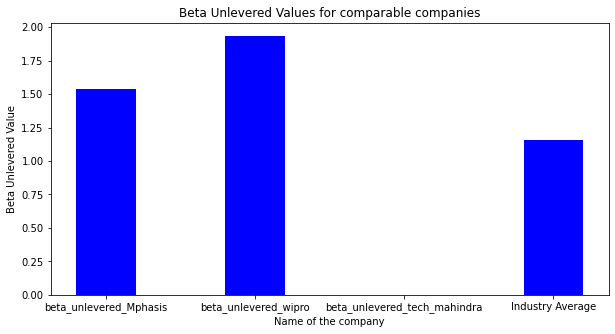

In [ ]:
data = {'beta_unlevered_Mphasis':beta_unlevered1, 'beta_unlevered_wipro':beta_unlevered2, 'beta_unlevered_tech_mahindra':beta_unlevered3,'Industry Average':industry_beta_unlevered_average}
key = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(key, values, color ='blue',
        width = 0.4)
 
plt.xlabel("Name of the company")
plt.ylabel("Beta Unlevered Value")
plt.title("Beta Unlevered Values for comparable companies")
plt.show()

**Relevering of beta using Target D/E ratio i.e. for Infosys**

In [ ]:
infosys = yf.Ticker("INFY.NS")
balancesheet = infosys.balance_sheet
years = balancesheet.columns
d_e_final = 0
for i in range(1,4):
  d_e = balancesheet[years[i]][2]/balancesheet[years[i]][3]
  d_e_final += d_e
d_e_avg_infy = d_e_final / 3
print("D/E for Infosys:",d_e_avg_infy)
balancesheet

D/E for Infosys: 0.3152507174178804


,2021-03-31,2020-03-31,2019-03-31,2018-03-31
Intangible Assets,2.830000e+08,2.510000e+08,1.000000e+08,3.800000e+07
Capital Surplus,3.590000e+08,3.050000e+08,2.770000e+08,2.470000e+08
Total Liab,4.323000e+09,3.559000e+09,2.852000e+09,2.295000e+09
Total Stockholder Equity,1.044200e+10,8.646000e+09,9.391000e+09,9.960000e+09
Minority Interest,6.000000e+07,5.500000e+07,9.000000e+06,1.000000e+07
Deferred Long Term Liab,2.000000e+07,1.300000e+07,4.000000e+07,4.000000e+07
Other Current Liab,1.362000e+09,1.138000e+09,1.368000e+09,1.078000e+09
Total Assets,1.482500e+10,1.226000e+10,1.225200e+10,1.225500e+10
Common Stock,3.320000e+08,3.320000e+08,3.390000e+08,1.900000e+08
Other Current Assets,6.530000e+08,5.060000e+08,5.850000e+08,7.360000e+08


In [ ]:
beta_levered_infy = industry_beta_unlevered_average * (1 + (1-tc)*d_e_avg_infy)
print("Beta levered for infosys:",beta_levered_infy)


Beta levered for infosys: 1.4320517907908972



> Beta levered for infosys: 1.43205



In [ ]:
Ke_bu = Rf + beta_levered_infy*(Rm - Rf) # CAPM Model
print("Cost of Equity Capital for Infosys Using Bottom-Up approach:",Ke_bu*100)

Cost of Equity Capital for Infosys Using Bottom-Up approach: 10.70470465642832


**Cost of Equity Capital for Infosys Using Bottom-Up approach: 10.7047%**


Calculation of Cost of Debt

In [ ]:
# Interest coverage Ratio = EBIT/Interest expense  https://www.moneycontrol.com/india/stockpricequote/computers-software/infosys/IT
int_cov=139.852 #from moneycontrol
#Mapping the avg_interest_coverage to http://pages.stern.nyu.edu/~adamodar/New_Home_Page/valquestions/syntrating.htm
if int_cov > 12.5:
        #Rating is AAA
        credit_spread = 0.75 #in %
elif (int_cov > 9.5) & (int_cov <= 12.5):
        #Rating is AA
        credit_spread = 1
elif (int_cov > 7.5) & (int_cov <= 9.5):
        #Rating is A+
        credit_spread = 1.5
elif (int_cov > 6) & (int_cov <= 7.5):
        #Rating is A
        credit_spread = 1.8
elif (int_cov > 4.5) & (int_cov <= 6):
        #Rating is A-
        credit_spread = 2
elif (int_cov > 3.5) & (int_cov <= 4.5):
        #Rating is BBB
        credit_spread = 2.25
elif (int_cov > 3) & (int_cov <= 3.5):
        #Rating is BB
        credit_spread = 3.5
elif (int_cov > 2.5) & (int_cov <= 3):
        #Rating is B+
        credit_spread = 4.75
elif (int_cov > 2) & (int_cov <= 2.5):
        #Rating is B
        credit_spread = 6.5
elif (int_cov > 1.5) & (int_cov <= 2):
        #Rating is B-
        credit_spread = 8
elif (int_cov > 1.25) & (int_cov <= 1.5):
        #Rating is CCC
        credit_spread = 10
elif (int_cov > 0.8) & (int_cov <= 1.25):
        #Rating is CC
        credit_spread = 11.5
elif (int_cov > 0.5) & (int_cov <= 0.8):
        #Rating is C
        credit_spread = 12.7
elif int_cov <= 0.2:
        #Rating is D
        credit_spread = 14

Rb = Rf*100+credit_spread
print("Cost of Debt in %:",Rb)

Cost of Debt in %: 7.2299999999999995


**Cost of Debt in %: 7.229**

# Calculation of Weights


In [ ]:
balancesheet = infosys.balance_sheet #ws= ratio of equity to (equity+debt)
years = balancesheet.columns
ws_final = 0
for i in range(1,4):
  ws = balancesheet[years[i]][3]/(balancesheet[years[i]][3] + balancesheet[years[i]][2])
  ws_final += ws
ws_avg = ws_final / 3
print("Ws:",ws_avg)

Ws: 0.7627260850424872


In [ ]:
balancesheet = infosys.balance_sheet #wb= ratio of debt to (equity+debt)
years = balancesheet.columns
wb_final = 0
for i in range(1,4):
  wb = balancesheet[years[i]][2]/(balancesheet[years[i]][2] + balancesheet[years[i]][3])
  wb_final += wb
wb_avg = wb_final / 3
print("Wb:",wb_avg)

Wb: 0.2372739149575128





> *   Market Value of Equity = Price * Number of shares Outstanding
*   MVE = 657,092.58 in crores as on 19-04-2022












# **WACC Calculation**

In [ ]:
Rs = ((Ke_bu+Ke)/2)*100 # taking average of cost of capital obtained by top_down and bottom_up approach
print("Cost of Equity capital in %:",Rs)
print("Cost of debt:",Rb)
print("Proportion of equity to the total value of firm:",ws_avg)
print("Proportion of debt to the total value of firm:",wb_avg)
print("tax rate:",tc)
wacc = Rb*(1-tc)*wb_avg + Rs*ws_avg  # beta of debt is assumed to be neglible,Cost of preferred stock is neglected
print("WACC in %:",wacc)



Cost of Equity capital in %: 9.357751686919116
Cost of debt: 7.2299999999999995
Proportion of equity to the total value of firm: 0.7627260850424872
Proportion of debt to the total value of firm: 0.2372739149575128
tax rate: 0.25
WACC in %: 8.42401911282066


# **Results**

*   Risk free rate in % : 6.4799999999999995
*   Market Returns in %: 9.430106053144272
*   Cost of Equity Capital for Infosys Using Top Down-approach in %: 8.010795
*   Industry Average of Beta_unlevered: 1.1582061634433767
*   Beta levered for infosys: 1.4320501564008783
*   Cost of Equity Capital for Infosys Using Bottom-Up approach in %: 10.704699
*   Cost of Equity capital Taking Avg of both approaches %: 9.357747703585087
*   Cost of debt in %: 7.2299999999999995
*   Proportion of equity to the total value of firm: 0.7627260850424872
*   Proportion of debt to the total value of firm: 0.2372739149575128
*   tax rate: 0.25
*   WACC in %: 8.424016074627891



